In [2]:
import os
import cv2
import math
import random
import numpy as np
import pandas as pd
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [3]:
seed_constant=27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

(32, 224, 224, 3)
(32,)


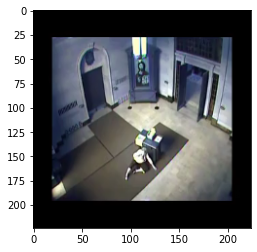

In [114]:
import os
DIR = 'DCSASS Dataset/'
all_classes_names = os.listdir(DIR)
random_range=random.sample(range(len(all_classes_names)),1)
length=len(all_classes_names)
for random_index in range(0,length):
    selected_class_Name=all_classes_names[random_index]
    labelsFile=pd.read_csv(f'Labels/{selected_class_Name}.csv')
    video_folder2=os.listdir(f'{DIR}{selected_class_Name}')
#     for i in range(0,len(video_folder2)):
    for i in range(0,1):
        video_folder3=os.listdir(f'{DIR}{selected_class_Name}/{video_folder2[i]}')
        outer_video_folder2=video_folder2[i]
        X=[]
        y=[]
        for j in range(0,len(video_folder3)):
            video=video_folder3[j]
            video_reader=cv2.VideoCapture(f'DCSASS Dataset/{selected_class_Name}/{outer_video_folder2}/{video}')
            success,frames=video_reader.read()
            labelsFile=pd.read_csv(f'Labels/{selected_class_Name}.csv')
            
            while success:
                # save frame as JPEG file
                # cv2.imwrite("images/"+selected_video_file_name+"%s.jpg" % count, frames)           
                
                # add image in array as numbers
                resized_frame=cv2.resize(frames,(224,224))
                normalized_frame=resized_frame/255
                X.append(normalized_frame)

                # Adding labels
                dic=labelsFile.set_index('className').to_dict('list')
                video_name=video.split(".")
                if video_name[0] in dic["fileName"]:
                    index=dic['fileName'].index(video_name[0])
                    y.append(dic["label"][index])
                success,frames = video_reader.read()
        X=np.array(X)
        y=np.array(y)
        print(X.shape)
        print(y.shape)
        break
    break

#
#     videos_folder=os.listdir(f'{DIR}{selected_class_Name}/{single_video_files_names_list}')
#     for i in range(len(selected_class_Name)):
#         print(selected_class_Name[i])
#         single_video_files_names_list=i
#         videos_folder=os.listdir(f'{DIR}{selected_class_Name}/{single_video_files_names_list}')
#         print(videos_folder)
#         for j in range(len(i)):
#             print(i[j])
#     video_files_names_list=os.listdir(f'{DIR}/{selected_class_Name}')
#     single_video_files_names_list=video_files_names_list[random_index]
#     videos_folder=os.listdir(f'{DIR}{selected_class_Name}/{single_video_files_names_list}')
#     selected_video_file_name=videos_folder[random_index]
#     print(video_files_names_list)

# for counter,random_index in enumerate(random_range,1):
#     # Getting videos names to extract frames     
#     selected_class_Name=all_classes_names[random_index]
#     video_files_names_list=os.listdir(f'{DIR}/{selected_class_Name}')
#     single_video_files_names_list=video_files_names_list[random_index]
#     videos_folder=os.listdir(f'{DIR}{selected_class_Name}/{single_video_files_names_list}')
#     selected_video_file_name=videos_folder[random_index]
    
#     # Extracting frames     
#     video_reader=cv2.VideoCapture(f'DCSASS Dataset/{selected_class_Name}/{single_video_files_names_list}/{selected_video_file_name}')
#     success,frames=video_reader.read()
#     print(selected_class_Name)
#     labelsFile=pd.read_csv(f'Labels/{selected_class_Name}.csv')
#     count = 0
#     X=[]
#     y=[]
#     while success:
#         # save frame as JPEG file
#         # cv2.imwrite("images/"+selected_video_file_name+"%s.jpg" % count, frames)           
        
#         # add image in array as numbers
#         resized_frame=cv2.resize(frames,(224,224))
#         normalized_frame=resized_frame/255
#         X.append(normalized_frame)
        
#         # Adding labels
#         dic=labelsFile.set_index('className').to_dict('list')
#         video_name=selected_video_file_name.split(".")
#         if video_name[0] in dic["fileName"]:
#             index=dic['fileName'].index(video_name[0])
#             y.append(dic["label"][index])
#         success,frames = video_reader.read()
#         count += 1
#     X=np.array(X)
#     y=np.array(y)
#     print(X.shape)
#     print(y.shape)

In [110]:
# SEQUENCE_LENGTH=25

# def frames_extraction(video_path):
#     frames_list=[]
#     video_reader=cv2.VideoCapture(video_path)
#     video_frames_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    
#     skip_frames_window=max(int(video_frames_count/SEQUENCE_LENGTH),1)
    
#     for frame_counter in range(SEQUENCE_LENGTH):
#         video_reader.set(cv2.CAP_PROP_FRAMES,frame_counter*skip_frames_window)
        
#         success,frame=video_reader.read()
#         if not success:
#             break
        
#         resized_frame=cv2.resize(frame,(224,224))
#         normalized_frame=resized_frame/255
#         frames_list.append(normalized_frame)
#     video_reader.release()
#     return frame_ist
    

In [146]:
# def create_dataset():
#     features=[]
#     labels=[]
#     video_file_path=[]
    
#     for class_index,class_name in enumerate(all_classes_names):
#         print(f'Extracting data of class {class_name}')
#         file_list=os.listdir(os.path.join("DCSASS Dataset/",class_name,file_name)
        
#         for file_name in file_list:
#             video_file_path=os.path.join("DCSASS Dataset/",class_name,file_name)
#             frames=frames_extraction(video)
                             
#             if len(frames)==SEQUENCE_LENGTH:
#                 features.append(frames)
#                 labels.append(class_index)
#                 video_files.path.append(video_file_path)
#     features=np.array(features)
#     labels=np.array(labels)

#     return features,labels,video_file_path

    

SyntaxError: invalid syntax (Temp/ipykernel_10280/1816030864.py, line 10)

In [112]:
# features,labels,video_file_path=create_dataset()

In [113]:
# one_hot_encoding=to_categorical(labels)

1
Arson
1
Assault
1
Burglary
1
DCSASS Dataset
1
Explosion
1
Fighting
1
RoadAccidents
1
Robbery
1
Shooting
1
Shoplifting
1
Stealing
1
Vandalism


In [101]:
labelsFile

,fileName,className,label
0,Abuse001_x264_0,Abuse,0.0
1,Abuse001_x264_1,Abuse,0.0
2,Abuse001_x264_2,Abuse,0.0
3,Abuse001_x264_3,Abuse,0.0
4,Abuse001_x264_4,Abuse,1.0
...,...,...,...
1211,Abuse050_x264_27,Abuse,1.0
1212,Abuse050_x264_28,Abuse,1.0
1213,Abuse050_x264_29,Abuse,1.0
1214,Abuse050_x264_30,Abuse,1.0


In [88]:
a=[1,2,3,4,5]
b=[6,7,8,9,10]
c=[]

In [93]:
for i in range(0,len(a)):
    c.append(a[i])
    
for i in range(0,len(b)):
    c.append(b[i])

In [94]:
c

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]